<a href="https://colab.research.google.com/github/ayportella/learning_more_about_sql/blob/main/20_projeto_banco_de_dados_geo_pocos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto de Banco de Dados Geológicos**

Andressa Yumi Portella</br>

Setembro de 2023</br>


**Problema de Negócio**

É preciso montar um banco de dados para uma empresa que deseja modernizar o acesso e a segurança de seus dados, e para isso é necessário cadastrar os registros de poços perfurados no Brasil.

Cada poço possui:

*   um número de registro no banco de dados;
*   apenas um número de cadastro (também conhecido como UWI) obrigatório;
*   coordenadas geográficas (latitude e longitude);
*   profundidade (profundidade, mesa rotativa, cota altimétrica, lâmina d'água) não obrigatórios, porque poços com acidente mecânico não têm essas informações;
*   uma localização em uma bacia sedimentar, em terra ou mar;
*   uma reclassificação;
*   uma categoria.
</br>

O que define a **cardinalidade** é a **regra de negócio**. Sendo assim, essa regra de negócio foi estabelecida tendo em vista minha experiência na área de petróleo e o que faz sentido no contexto de poços exploratórios de petróleo e gás, mas poderia mudar a depender do que a empresa busca .



Uma bacia sedimentar pode se relacionar a vários poços, por isso a relação é 1-n e foi criada uma chave estrangeira (foreign key) ID_BACIA na entidade POCOS. O mesmo ocorre para Categoria e Reclassificação.

Já para Coordenadas e Profundidade, achei primeiramente que faria mais sentido colocar ID_POCO como chave estrangeira, relacionando-se com o id do poço, já que são informações numéricas específicas para cada poço. Porém isso dificultaria o preenchimento dos registros, e eles foram incluídos como atributos dentro da tabela POCOS.

A maioria das relações criadas são **1-1** ou **1-n**, já que são informações obrigatórias que se relacionam com informação de outra entidade.

1-1 significa que um poço tem apenas uma categoria, por exemplo, mas diferentes categorias podem corresponder a registros de poços (1-n).

0-1 significa que um poço não tem obrigatoriedade de ter um registro de reclassificação, mas se o tiver, terá apenas um registro.

Não foi possível nesse projeto exemplificar um tipo de relação **n-n**, porque os registros de poços são únicos e não se relacionam com entidades que tenham mais de um tipo de registro, no caso uma entidade associativa, e a criação de uma relação base ou tabela base.

 **Modelagem Lógica**

Foi utilizado o software Br Modelo para criar o modelo lógico, ilustrando as entidades, atributos e relações criadas.

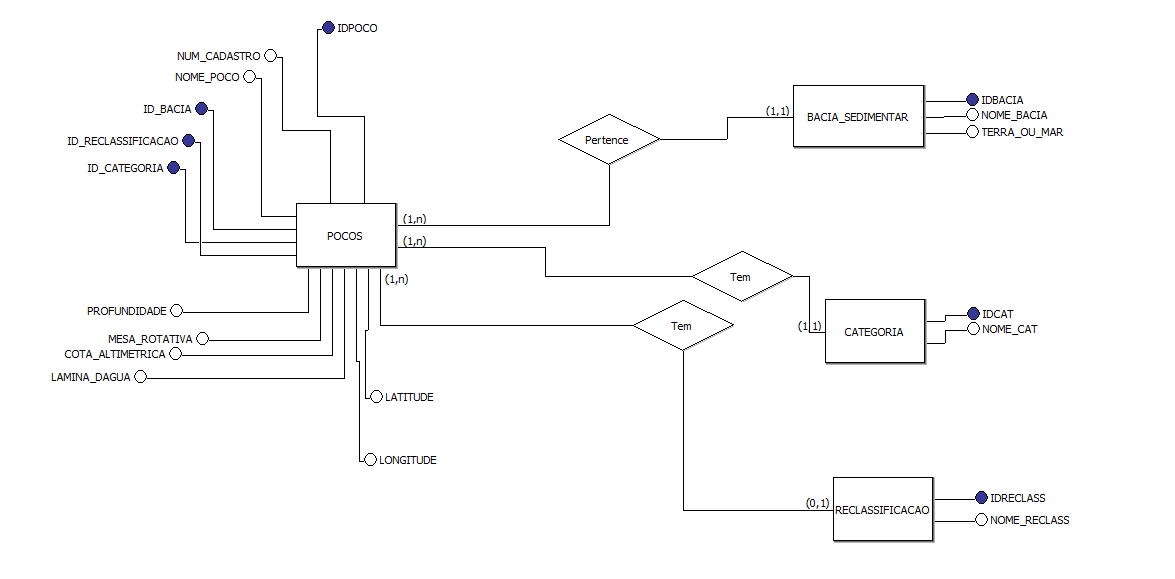

Os quadrados são as entidades e os símbolos redondos brancos, atributos. Os símbolos azuis correspondem a chaves primárias ou chaves estrangeiras (com undescore '_'), e os losangos, a relações entre entidades, ou tabelas.
Nas representações entre parênteses podemos ver as relações entre as entidades, lembrando da representação de [cardinalidade cruzada ou inversa](https://cursos.alura.com.br/forum/topico-cardinalidade-livro-editora-invertida-157230).

Você pode entender mais sobre cardinalidade [aqui](https://managebi.com/2020/07/23/modelo-relacional-cardinalidade/).

Você pode entender mais sobre chaves primárias e estrangeiras [aqui](https://horadecodar.com.br/chave-primaria-e-chave-estrangeira/#:~:text=Enquanto%20a%20prim%C3%A1ria%20%C3%A9%20usada,ser%20repetida%20em%20v%C3%A1rias%20tabelas.).

 **Modelagem Física**

O banco de dados chamado 'WELLS' foi criado e conectado no MySQL, um dos programas mais conhecidos de sistema de gerenciamento de bases de dados relacionais.</br>
É sempre indicado escrever seus códigos em SQL em um editor de textos, nesse caso foi usado o Notepad+, ao invés de direto no MySQL, pois pode ocorrer algum erro ou deletar uma tabela ou database. Além disso, é importante ter uma documentação do que foi feito no banco de dados salva em algum lugar.

```sql
CREATE DATABASE WELLS;

USE WELLS;
```

Com o comando abaixo você pode ver a criação efetivamente do banco de dados:
```sql
STATUS;
```

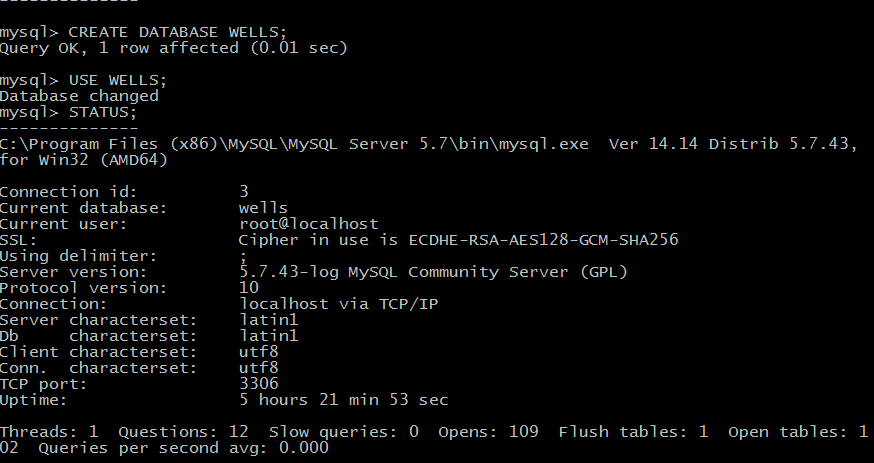

Criando a tabela POCOS:
```sql
CREATE TABLE POCOS(
	IDPOCO INT PRIMARY KEY AUTO_INCREMENT,
	NOME_POCO VARCHAR(20) NOT NULL UNIQUE,
	NUM_CADASTRO CHAR(12) NOT NULL UNIQUE,
	LATITUDE VARCHAR(15) NOT NULL,
	LONGITUDE VARCHAR(15) NOT NULL,
	PROFUNDIDADE FLOAT(10),
	MESA_ROTATIVA FLOAT(10),
	COTA_ALTIMETRICA FLOAT(5),
	LAMINA_DAGUA FLOAT(5),
	ID_BACIA INT,
	ID_RECLASSIFICACAO INT,
	ID_CATEGORIA INT
);
```

O IDPOCO é um valor inteiro, sendo chave primária, e de auto incremento, ou seja, seus valores serão criados conforme adição na tabela automaticamente.</br>
NOME_POCO terá variável 'VARCHAR', já que o número de caracteres varia.</br>
Para o Número de Cadastro, foi utilizado o tipo 'CHAR', porque pode variar entre 11 a 12 caracteres, não sendo uma variação considerável.</br>


As informações de PROFUNDIDADE, MESA_ROTATIVA, COTA_ALTIMETRICA e LAMINA_DAGUA foram definidos como FLOAT porque isso permite a manipulação dessas informações de maneira matemática, que pode ser importante para esses dados. </br>
Já os registros de ID_BACIA, ID_RECLASSIFICACAO e ID_CATEGORIA irão se relacionar com chaves primárias em outras tabelas que veremos a seguir.

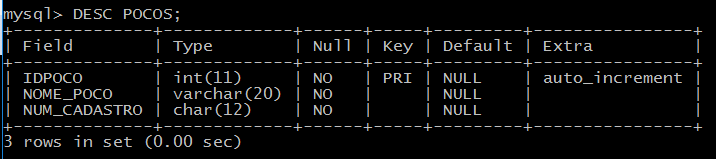

Criando a tabela BACIA_SEDIMENTAR:
```sql
CREATE TABLE BACIA_SEDIMENTAR(
	IDBACIA INT PRIMARY KEY NOT NULL,
	NOME_BACIA VARCHAR(20) NOT NULL UNIQUE,
	TERRA_OU_MAR ENUM('T','M') NOT NULL
);
```

Inserindo valores na tabela BACIA_SEDIMENTAR, com os nomes das bacias e se correspondem a bacias terrestres ou marítimas:
```sql
INSERT INTO BACIA_SEDIMENTAR VALUES(1,'ACRE','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(2,'ALAGOAS','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(3,'ALAGOAS','M');
INSERT INTO BACIA_SEDIMENTAR VALUES(4,'ALMADA','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(5,'ALMADA','M');
INSERT INTO BACIA_SEDIMENTAR VALUES(6,'AAMAZONAS','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(7,'ARARIPE','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(8,'BARREIRINHAS','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(9,'BARREIRINHAS','M');
INSERT INTO BACIA_SEDIMENTAR VALUES(10,'BRAGANCA-VIZEU','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(11,'CAMAMU','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(12,'CAMAMU','M');
INSERT INTO BACIA_SEDIMENTAR VALUES(13,'CAMPOS','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(14,'CAMPOS','M');
INSERT INTO BACIA_SEDIMENTAR VALUES(15,'CEARA','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(16,'CEARA','M');
INSERT INTO BACIA_SEDIMENTAR VALUES(17,'CUMURUXATIBA','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(18,'CUMURUXATIBA','M');
INSERT INTO BACIA_SEDIMENTAR VALUES(19,'ESPIRITO_SANTO','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(20,'ESPIRITO_SANTO','M');
INSERT INTO BACIA_SEDIMENTAR VALUES(21,'FOZ_DO_AMAZONAS','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(22,'FOZ_DO_AMAZONAS','M');
INSERT INTO BACIA_SEDIMENTAR VALUES(23,'JACUIPE','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(24,'JACUIPE','M');
INSERT INTO BACIA_SEDIMENTAR VALUES(25,'JATOBA','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(26,'JEQUITINHONHA','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(27,'JEQUITINHONHA','M');
INSERT INTO BACIA_SEDIMENTAR VALUES(28,'MARAJO','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(29,'MUCURI','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(30,'MUCURI','M');
INSERT INTO BACIA_SEDIMENTAR VALUES(31,'PANTANAL','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(32,'PARA-MARANHAO','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(33,'PARA-MARANHAO','M');
INSERT INTO BACIA_SEDIMENTAR VALUES(34,'PARANA','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(35,'PARECIS-ALTO_XINGU','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(36,'PARNAIBA','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(37,'PELOTAS','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(38,'PELOTAS','M');
INSERT INTO BACIA_SEDIMENTAR VALUES(39,'PERNAMBUCO-PARAIBA','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(40,'POTIGUAR','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(41,'POTIGUAR','M');
INSERT INTO BACIA_SEDIMENTAR VALUES(42,'RECONCAVO','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(43,'RECONCAVO','M');
INSERT INTO BACIA_SEDIMENTAR VALUES(44,'RIO_DO_PEIXE','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(45,'SANTOS','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(46,'SANTOS','M');
INSERT INTO BACIA_SEDIMENTAR VALUES(47,'SAO_FRANCISCO','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(48,'SAO LUIS','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(49,'SERGIPE','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(50,'SERGIPE','M');
INSERT INTO BACIA_SEDIMENTAR VALUES(51,'SOLIMOES','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(52,'TACUTU','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(53,'TUCANO_CENTRAL','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(54,'TUCANO_NORTE','T');
INSERT INTO BACIA_SEDIMENTAR VALUES(55,'TUCANO_SUL','T');
```

Alguns erros de digitação e escolha de tamanho de caracteres insuficientes ocorreram nesse último processo, mas é só digitar:
```sql
DROP TABLE BACIA_SEDIMENTAR
```
E então criar a tabela novamente.

Visualizando a tabela criada:

```sql
SELECT * FROM BACIA_SEDIMENTAR;
```


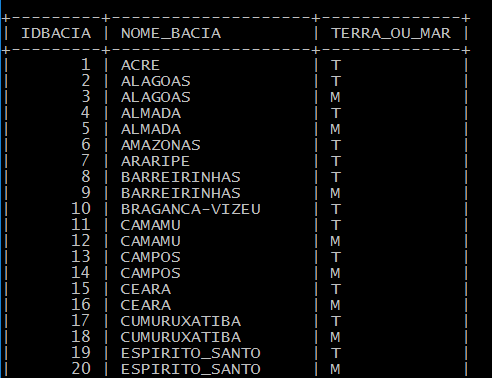

Criando a tabela CATEGORIA:
```sql
CREATE TABLE CATEGORIA(
	IDCAT INT PRIMARY KEY NOT NULL,
	NOME_CAT VARCHAR(22) NOT NULL UNIQUE
);
```


É de amplo conhecimento as categorias de poços utilizadas na área de petróleo, mas eles podem ser melhor explicados no seguinte [link](https://petrobras.com.br/fatos-e-dados/conheca-os-diferentes-tipos-de-pocos-de-petroleo-e-gas-natural.htm). </br>
Inclusive o primeiro número do nome do poço faz menção a essa categoria, por isso correspondi também o IDCAT com esse número. Por exemplo, o poço 4-VR-4-RN é um poço pioneiro adjacente.

Sendo assim, inseri os seguintes valores na tabela CATEGORIAS:
```sql
INSERT INTO CATEGORIA VALUES(1,'PIONEIRO');
INSERT INTO CATEGORIA VALUES(2,'ESTRATIGRAFICO');
INSERT INTO CATEGORIA VALUES(3,'EXTENSAO');
INSERT INTO CATEGORIA VALUES(4,'PIONEIRO_ADJACENTE');
INSERT INTO CATEGORIA VALUES(5,'JAZIDA_MAIS_RASA');
INSERT INTO CATEGORIA VALUES(6,'JAZIDA_MAIS_PROFUNDA');
INSERT INTO CATEGORIA VALUES(7,'DESENVOLVIMENTO');
INSERT INTO CATEGORIA VALUES(8,'INJECAO');
INSERT INTO CATEGORIA VALUES(9,'ESPECIAL');
```

Criando a tabela RECLASSIFICACAO:
```sql
CREATE TABLE RECLASSIFICACAO(
	IDRECLASS INT PRIMARY KEY NOT NULL,
	NOME_RECLASS VARCHAR(61) NOT NULL UNIQUE
);
```

E inseri os valores:
```sql
INSERT INTO RECLASSIFICACAO VALUES(1,'DESCOBRIDOR_DE_CAMPO_COM_PETROLEO');
INSERT INTO RECLASSIFICACAO VALUES(2,'DESCOBRIDOR_DE_CAMPO_COM_PETROLEO_E_GAS_NATURAL');
INSERT INTO RECLASSIFICACAO VALUES(3,'DESCOBRIDOR_DE_CAMPO_COM_GAS_NATURAL');
INSERT INTO RECLASSIFICACAO VALUES(4,'DESCOBRIDOR_DE_NOVA_JAZIDA_PETROLEO');
INSERT INTO RECLASSIFICACAO VALUES(5,'DESCOBRIDOR_DE_NOVA_JAZIDA_PETROLEO_E_GAS_NATURAL');
INSERT INTO RECLASSIFICACAO VALUES(6,'DESCOBRIDOR_DE_NOVA_JAZIDA_PETROLEO_GAS_NATURAL_E_CONDENSADO');
INSERT INTO RECLASSIFICACAO VALUES(7,'DESCOBRIDOR_DE_NOVA_JAZIDA_GAS_NATURAL');
INSERT INTO RECLASSIFICACAO VALUES(9,'DESCOBRIDOR_DE_NOVA_JAZIDA_GAS_NATURAL_E_CONDENSADO');
INSERT INTO RECLASSIFICACAO VALUES(10,'PORTADOR_DE_PETROLEO');
INSERT INTO RECLASSIFICACAO VALUES(11,'PORTADOR_DE_PETROLEO_E_GAS_NATURAL');
INSERT INTO RECLASSIFICACAO VALUES(12,'PORTADOR_DE_GAS_NATURAL');
INSERT INTO RECLASSIFICACAO VALUES(13,'PORTADOR DE GAS_NATURAL_E_CONDENSADO');
INSERT INTO RECLASSIFICACAO VALUES(14,'ABANDONADO_POR_ACIDENTE_MECANICO');
INSERT INTO RECLASSIFICACAO VALUES(15,'ABANDONADO_POR_IMPOSSIBILIDADE_DE_AVALIACAO');
INSERT INTO RECLASSIFICACAO VALUES(16,'ABANDONADO_POR_OBJETIVO_FORA_DE_PREVISAO');
INSERT INTO RECLASSIFICACAO VALUES(17,'ABANDONADO_POR_OBJETIVO/ALVO_NAO_ATINGIDO');
INSERT INTO RECLASSIFICACAO VALUES(18,'ABANDONADO_POR_OUTRAS_RAZOES');
INSERT INTO RECLASSIFICACAO VALUES(19,'ABANDONADO_POR_PERDA_CIRCULACAO');
INSERT INTO RECLASSIFICACAO VALUES(20,'INJECAO_DE_AGUA');
INSERT INTO RECLASSIFICACAO VALUES(21,'DESCARTE_DE_AGUA');
INSERT INTO RECLASSIFICACAO VALUES(22,'PRODUCAO_DE_AGUA');
INSERT INTO RECLASSIFICACAO VALUES(23,'PRODUTOR_COMERCIAL_DE_PETROLEO');
INSERT INTO RECLASSIFICACAO VALUES(24,'PRODUTOR_COMERCIAL_DE_PETROLEO_E_GAS_NATURAL');
INSERT INTO RECLASSIFICACAO VALUES(25,'PRODUTOR_COMERCIAL_DE_GAS_NATURAL');
INSERT INTO RECLASSIFICACAO VALUES(26,'PRODUTOR_SUBCOMERCIAL_DE_PETROLEO');
INSERT INTO RECLASSIFICACAO VALUES(27,'PRODUTOR_SUBCOMERCIAL_DE_PETROLEO_E_GAS_NATURAL');
INSERT INTO RECLASSIFICACAO VALUES(28,'PRODUTOR_SUBCOMERCIAL_DE_GAS_NATURAL');
INSERT INTO RECLASSIFICACAO VALUES(29,'PRODUTOR_SUBCOMERCIAL_DE_GAS_NATURAL_E_CONDENSADO');
INSERT INTO RECLASSIFICACAO VALUES(30,'INJECAO_DE_GAS_NATURAL');
INSERT INTO RECLASSIFICACAO VALUES(31,'EXPERIMENTAL');
INSERT INTO RECLASSIFICACAO VALUES(32,'EXTENSAO_PARA_PETROLEO');
INSERT INTO RECLASSIFICACAO VALUES(33,'EXTENSAO_PARA_PETROLEO_E_GAS_NATURAL');
INSERT INTO RECLASSIFICACAO VALUES(34,'EXTENSAO_PARA_PETROLEO_GAS_NATURAL_E_CONDENSADO');
INSERT INTO RECLASSIFICACAO VALUES(35,'EXTENSAO_PARA_GAS_NATURAL');
INSERT INTO RECLASSIFICACAO VALUES(36,'EXTENSAO_PARA_GAS_NATURAL_E_CONDENSADO');
INSERT INTO RECLASSIFICACAO VALUES(37,'SECO_COM_INDICIOS_DE_PETROLEO');
INSERT INTO RECLASSIFICACAO VALUES(38,'SECO_COM_INDICIOS_DE_PETROLEO_E_GAS_NATURAL');
INSERT INTO RECLASSIFICACAO VALUES(39,'SECO_COM_INDICIOS_GAS_NATURAL');
INSERT INTO RECLASSIFICACAO VALUES(40,'SECO_COM_INDICIOS_DE_GAS_NATURAL_E_CONDENSADO');
INSERT INTO RECLASSIFICACAO VALUES(41,'SECO_SEM_INDICIOS');
INSERT INTO RECLASSIFICACAO VALUES(42,'INDEFINIDO');
INSERT INTO RECLASSIFICACAO VALUES(43,'OBSERVACAO');
INSERT INTO RECLASSIFICACAO VALUES(44,'OUTRAS_FINALIDADES');
```

Dica: altere no vscode ou programando em python, por exemplo, para alterar múltiplas palavras ao mesmo tempo.

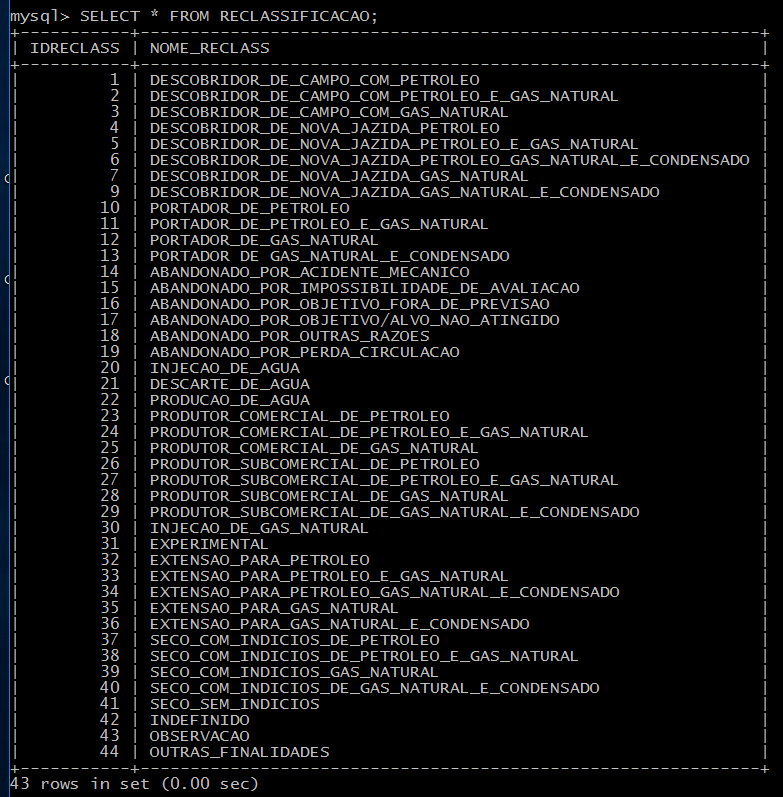

Essas são as tabelas criadas:

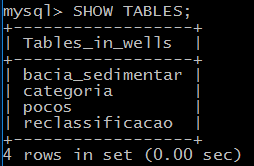

**Inserindo Chaves Estrangeiras**

Agora iremos inserir as chaves estrangeiras na tabela POCOS:

**ID_BACIA**:
```sql
ALTER TABLE POCOS
ADD CONSTRAINT FK_POCOS_BACIA
FOREIGN KEY(ID_BACIA)
REFERENCES BACIA_SEDIMENTAR(IDBACIA);
```

**ID_CATEGORIA**:
```sql
ALTER TABLE POCOS
ADD CONSTRAINT FK_POCOS_CATEGORIA
FOREIGN KEY(ID_CATEGORIA)
REFERENCES CATEGORIA(IDCAT);
```

**ID_RECLASSIFICACAO**:
```sql
ALTER TABLE POCOS
ADD CONSTRAINT FK_POCOS_RECLASSIFICACAO
FOREIGN KEY(ID_RECLASSIFICACAO)
REFERENCES RECLASSIFICACAO(IDRECLASS);
```







**Inserindo valores na tabela POCOS, finalmente**

A fim de entender a ordem dos registros na tabela POCOS, podemos fazer o seguinte comando:
```sql
DESC POCOS;
```
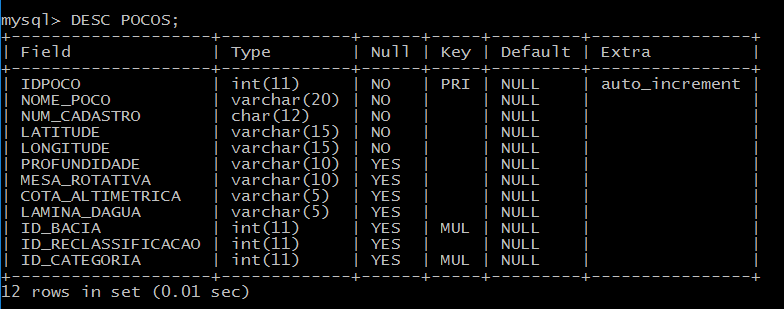


O foco deste projeto será a criação do modelo do banco de dados, por isso apenas serão introduzidos 5 registros para exemplificar como isso pode ser feito:
```sql
INSERT INTO POCOS VALUES(NULL,'3-BRSA-988-RJS','74281025768','-22.6987780555','-40.2822744444',3660,28,0,1037,14,10,3);
INSERT INTO POCOS VALUES(NULL,'3-APR-5-BA','202400279900','-12.2789758333','-38.1653130555','2000',78.9,0,0,42,4,3);
INSERT INTO POCOS VALUES(NULL, '1-BRSA-789-ESS','34271024382','-20.1073075','-39.2042808333',5209,18,0,1877,20,11,1);
INSERT INTO POCOS VALUES(NULL,'2-ALST-1-PA','600300022200','-1.5331313888','-52.6185425',2909,26,0,0,6,41,2);
INSERT INTO POCOS VALUES(NULL,'4-ALS-50-AL','081160398200','-10.4125544444','-36.2597894444',NULL,NULL,NULL,NULL,3,26,4);
```

O último registro é de um poço considerado arrasado, logo ele não tem os valores de profundidade, mesa rotativa, cota altimétrica e lâmina d'água, que não são considerados obrigatórios.

**Apenas para não perder o costume, vamos fazer um INNER JOIN?**
```sql
SELECT P.IDPOCO, P.NOME_POCO, P.NUM_CADASTRO, B.NOME_BACIA, C.NOME_CAT
FROM POCOS P
INNER JOIN BACIA_SEDIMENTAR B
ON P.ID_BACIA = B.IDBACIA
INNER JOIN CATEGORIA C
ON P.ID_CATEGORIA = C.IDCAT;```




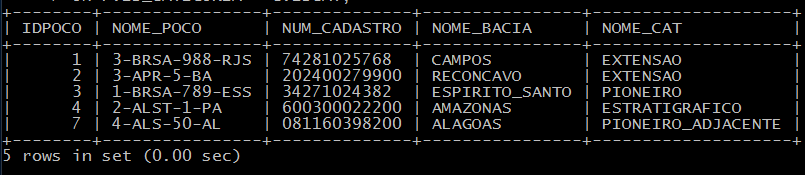

Você pode saber mais sobre **join** [aqui](https://www.devmedia.com.br/clausulas-inner-join-left-join-e-right-join-no-sql-server/18930).

**Considerações Finais**

Essa é uma consolidação de um aprendizado meu sobre como montar um banco de dados do zero, com dados abertos de poços da ANP. Vários conhecimentos foram colocados em prática, como o entendimento do problema de negócio, a criação de modelagens lógica e física, a geração de chaves primárias e estrangeiras, as escolhas de tipos de variáveis, entre outros.

É importante notar que a modelagem pode ocorrer continuamente com a construção e a inserção de registros num banco de dados, uma vez que você perceba o que realmente faz sentido e qual a maneira mais fácil de preenchê-lo.</br>
Isso ocorreu nas escolhas das entidades, porque primeiramente tinha separado os registros de profundidade e de latitude e longitude em entidades separadas de POCOS, mas percebi que isso dificultaria o preenchimento dos registros.

Outro fato importante é que o preenchimento dessa tabela pode ocorrer de maneira automatizada para muitos registros em uma etapa de **ETL** (extração, transformação e carregamento), com funções de concatenar e proc (lookup) no Excel, por exemplo, ou merge programando em Python.

**Andressa Yumi Portella**</br>
[Linkedin](https://www.linkedin.com/in/andressa-yumi-portella/)